# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix

In [2]:
df = pd.read_csv('previsao_de_renda.csv')
df.head(3)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98


### Explorando os dados:

In [4]:
df.isna().sum()

Unnamed: 0                  0
data_ref                    0
index                       0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2534
qt_pessoas_residencia       0
mau                         0
renda                       0
dtype: int64

In [5]:
df.dtypes

Unnamed: 0                 int64
data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

In [6]:
# removendo a coluna Unnamed: 0
df_na = df.dropna()
df_na = df_na.drop('Unnamed: 0', axis=1)

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [8]:
# Variaveis quantitativas: posse_de_veiculo posse_de_imovel qtd_filhos tempo_emprego idade renda
df_tarefa_1 = df_na[['qtd_filhos','tempo_emprego','idade','renda','qt_pessoas_residencia']]

In [79]:
df_tarefa_1.corr()

,qtd_filhos,tempo_emprego,idade,renda,qt_pessoas_residencia
qtd_filhos,1.000000,-0.074250,-0.289012,-0.016189,0.908703
tempo_emprego,-0.074250,1.000000,0.323934,0.394235,-0.065748
idade,-0.289012,0.323934,1.000000,0.151364,-0.257281
renda,-0.016189,0.394235,0.151364,1.000000,-0.004865
qt_pessoas_residencia,0.908703,-0.065748,-0.257281,-0.004865,1.000000


C:\Users\Felipe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Felipe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Felipe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Felipe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

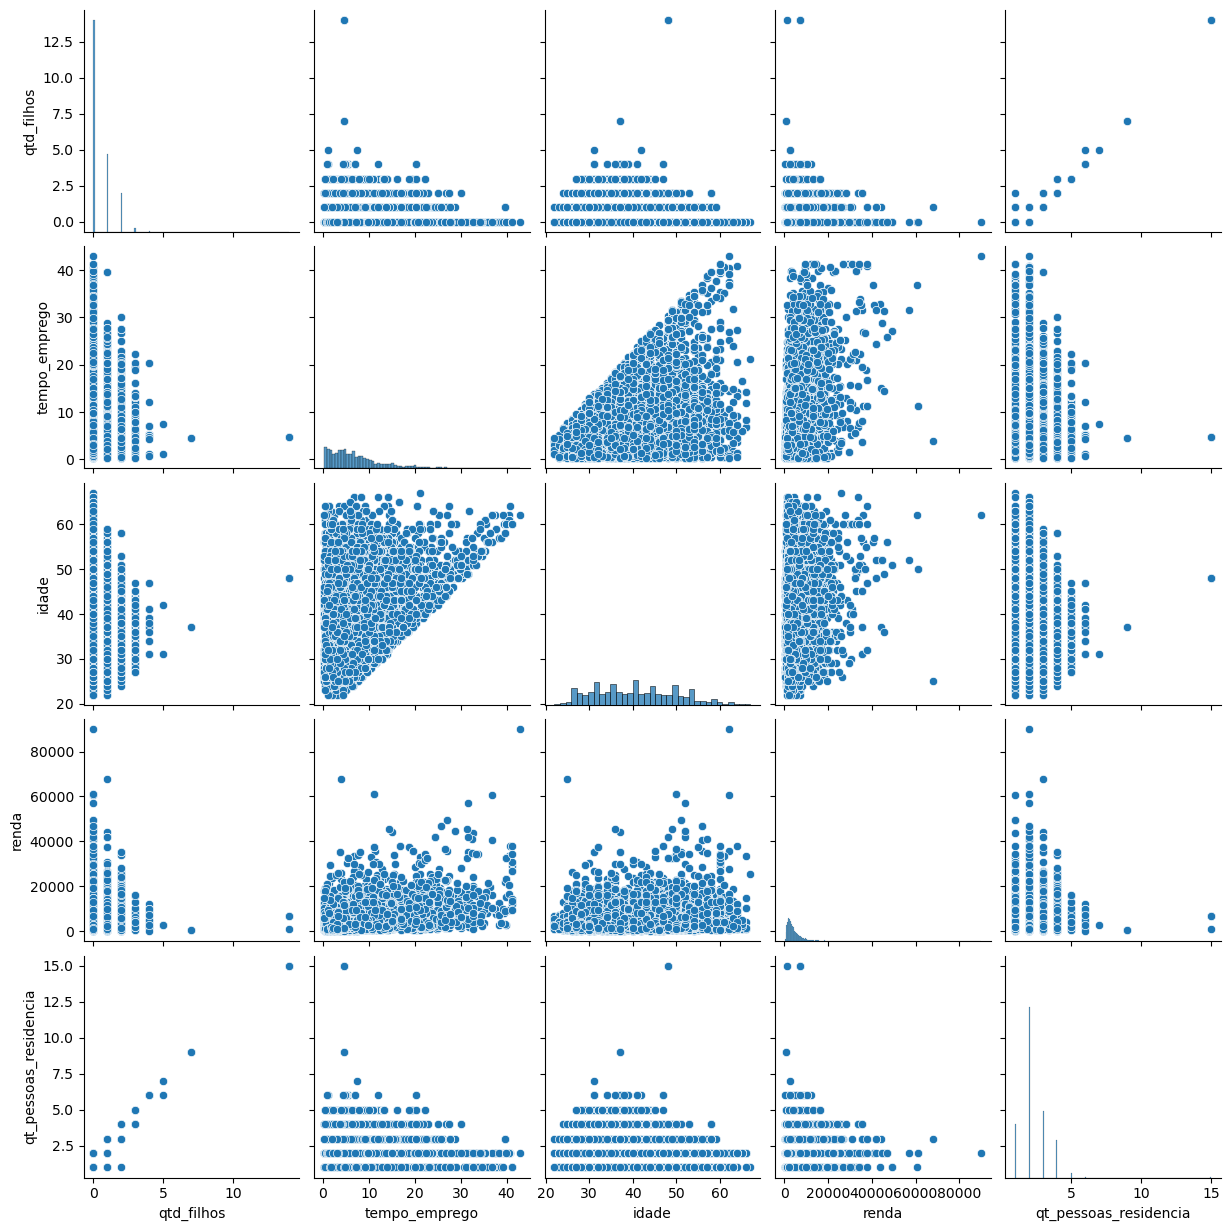

In [81]:
sns.pairplot(df_tarefa_1)
plt.show()

### R: Existem algumas correlações positivas entre [qtd_filhos x qt_pessoas_residencia], [idade x tempo_emprego]. Além disso existe uma leve sugestão de correlação positiva entre [renda x tempo_emprego]

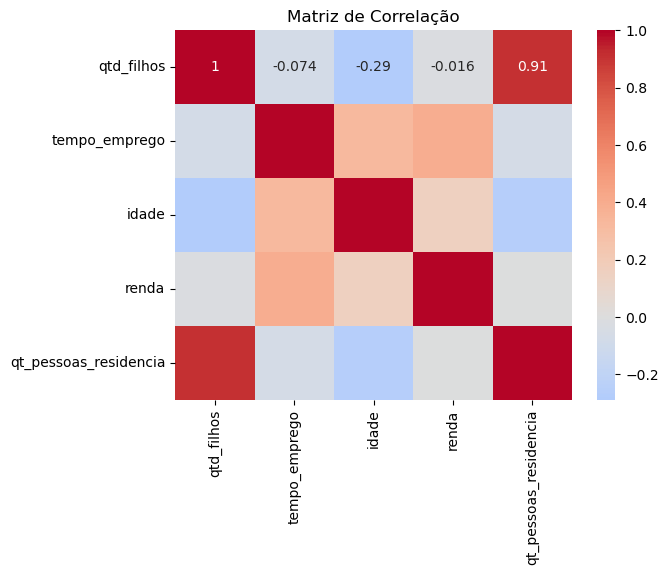

In [82]:
# Calculando a matriz de correlação
matriz_correlacao = df_tarefa_1.corr()

# Criando o heatmap. Usei annot para visualizar os valores da primeira linha

sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

C:\Users\Felipe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Felipe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Felipe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


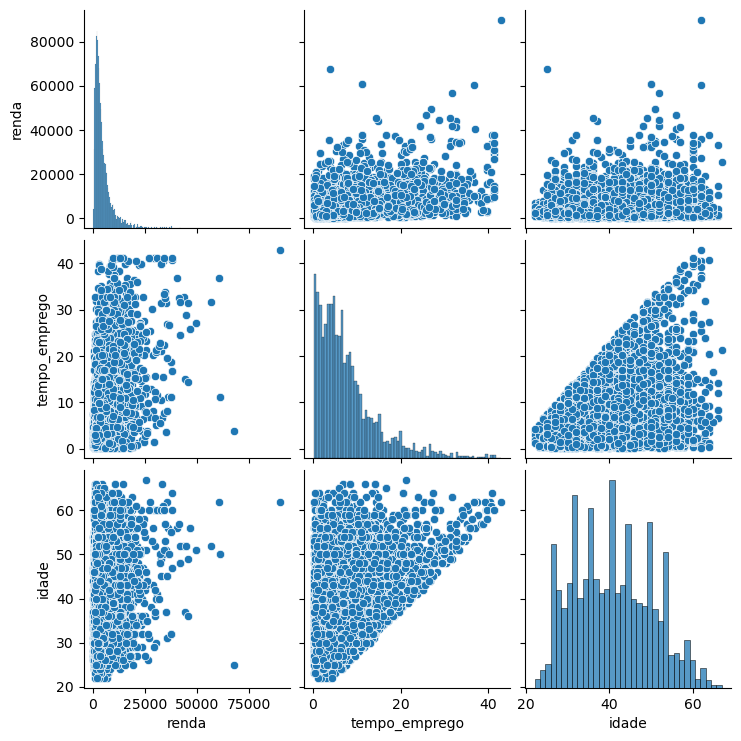

In [14]:
df_tarefa_2 = df_na[['renda','tempo_emprego','idade']]
sns.pairplot(df_tarefa_2)
plt.show()

#### R: No gráfico acima é possível ver uma correlação positiva entre [renda x tempo_emprego]

3) Na sua opinião, há outliers na variável renda?

#### R: Sim, existem outliers na variável renda. É possível ve-los no gráfico e podemos procurar por esses valores na coluna:

In [18]:
df_tarefa_1['renda'].nlargest(10)

9934     89918.04
113      67794.54
7078     60965.51
9028     60965.51
7765     60475.59
6772     56938.90
10533    49420.10
14341    49420.10
5452     46723.48
14531    46723.48
Name: renda, dtype: float64

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [57]:
df_tarefa_4 = df[['renda']]

In [59]:
# Calcular o log de renda
log_tarefa_4 = np.log(df_tarefa_4[['renda']])

In [61]:
log_tarefa_4.columns = ['log_renda']

In [115]:
df_tarefa_4_log_renda = df_na[['qtd_filhos','tempo_emprego','idade','qt_pessoas_residencia','renda']]

In [117]:
# Concatenar a coluna log_renda com o dataframe e remover valores NaN
df_final= pd.concat([df_tarefa_4_log_renda, log_tarefa_4], axis=1)
df_final.dropna(inplace=True)
df_final

,qtd_filhos,tempo_emprego,idade,qt_pessoas_residencia,renda,log_renda
0,1.0,3.575342,36.0,3.0,3369.24,8.122442
1,0.0,0.860274,42.0,2.0,6096.14,8.715411
2,2.0,8.065753,31.0,4.0,5658.98,8.640999
3,0.0,1.208219,50.0,2.0,7246.69,8.888300
4,0.0,13.873973,52.0,2.0,4017.37,8.298383
...,...,...,...,...,...,...
14995,1.0,2.046575,37.0,3.0,1193.29,7.084469
14996,1.0,12.079452,30.0,3.0,2519.18,7.831689
14997,0.0,2.161644,40.0,2.0,1586.85,7.369506
14998,0.0,3.295890,47.0,2.0,6975.39,8.850144


In [119]:
df_final.corr()

,qtd_filhos,tempo_emprego,idade,qt_pessoas_residencia,renda,log_renda
qtd_filhos,1.000000,-0.074250,-0.289012,0.908703,-0.016189,-0.005300
tempo_emprego,-0.074250,1.000000,0.323934,-0.065748,0.394235,0.379556
idade,-0.289012,0.323934,1.000000,-0.257281,0.151364,0.145638
qt_pessoas_residencia,0.908703,-0.065748,-0.257281,1.000000,-0.004865,0.008412
renda,-0.016189,0.394235,0.151364,-0.004865,1.000000,0.836656
log_renda,-0.005300,0.379556,0.145638,0.008412,0.836656,1.000000


C:\Users\Felipe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Felipe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Felipe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Felipe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

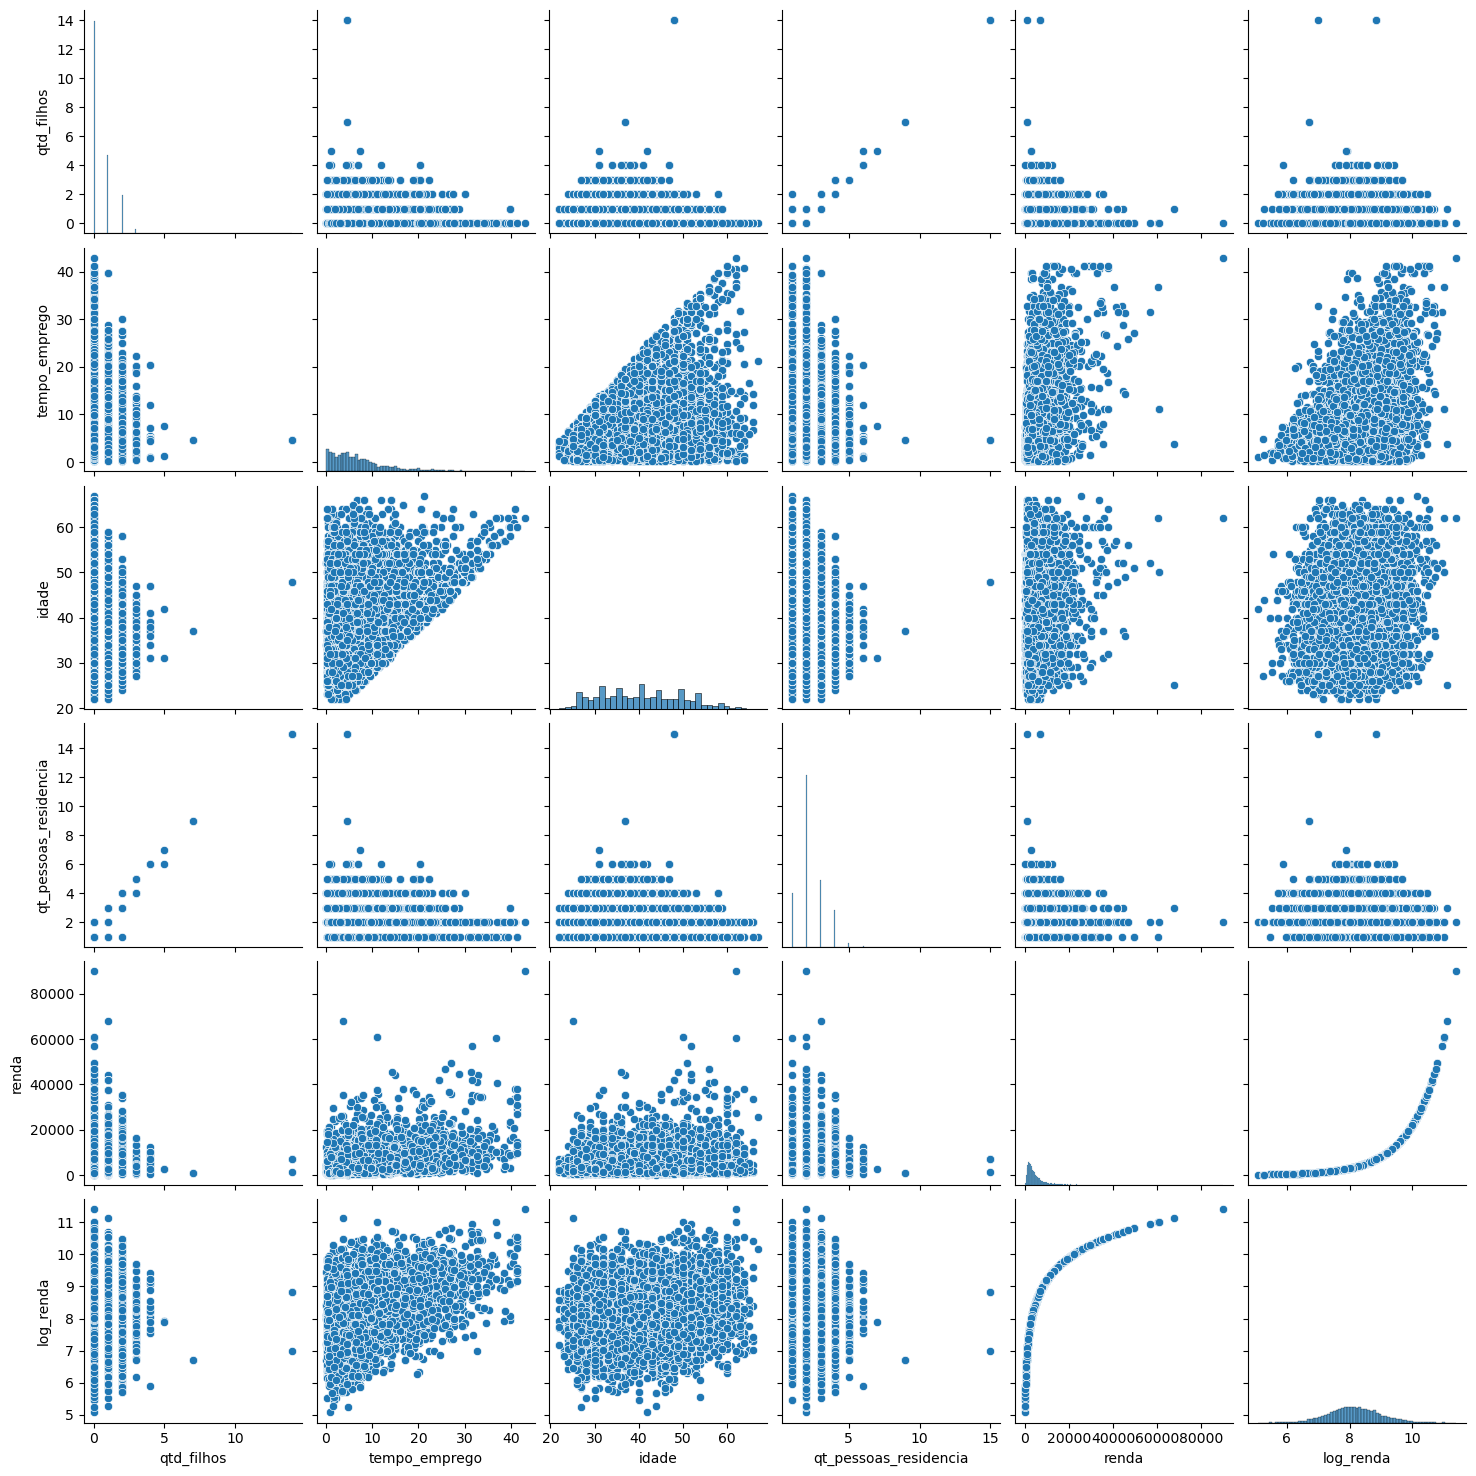

In [121]:
sns.pairplot(df_final)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

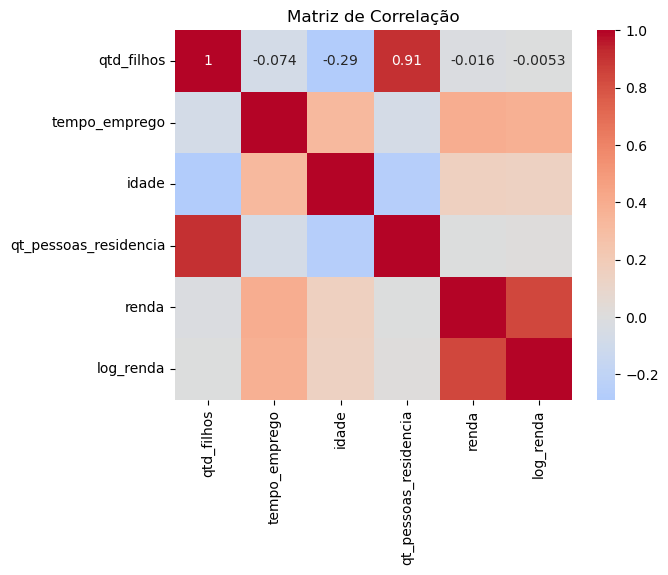

In [161]:
# Calculando a matriz de correlação
matriz_correlacao_2 = df_final.corr()

# Criando o heatmap
sns.heatmap(matriz_correlacao_2, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

### R: No scatterplot eu decidi deixar renda e log_renda juntos para comparar a mudança com e sem. No gráfico [tempo_emprego X renda_log] onde houve a aplicação do log é possível observar uma leve correlação positiva e nenhuma correlação com idade. Então sim, melhorou a análise. 

### Além disso, achei curioso que no heat a diferença por cor entre  [tempo_emprego X renda_log] e  [tempo_emprego X renda]  é quase imperceptível

In [132]:
df_final.corr()

,qtd_filhos,tempo_emprego,idade,qt_pessoas_residencia,renda,log_renda
qtd_filhos,1.000000,-0.074250,-0.289012,0.908703,-0.016189,-0.005300
tempo_emprego,-0.074250,1.000000,0.323934,-0.065748,0.394235,0.379556
idade,-0.289012,0.323934,1.000000,-0.257281,0.151364,0.145638
qt_pessoas_residencia,0.908703,-0.065748,-0.257281,1.000000,-0.004865,0.008412
renda,-0.016189,0.394235,0.151364,-0.004865,1.000000,0.836656
log_renda,-0.005300,0.379556,0.145638,0.008412,0.836656,1.000000
